Importing all of the libraries and configuring them.

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
sns.set_palette("husl")
%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Loading the Dataset.

In [38]:
df = pd.read_csv('../data/raw/Housing_Price_Data.csv')
print("Dataset loaded successfully!")
print(f"Shape: {df.shape}")
df.head()

Dataset loaded successfully!
Shape: (545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


Get Dataset overview.

In [39]:
print("=== Dataset Info ===")
df.info()
print("\n=== Column Names ===")
print(df.columns.tolist())

=== Dataset Info ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB

=== Column Names ===
['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', '

Finding any missing values in the dataset and visualizing them if any are present.

In [40]:

print("=== Missing Values ===")
missing = df.isnull().sum()
missing_percent = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing_Count': missing,
    'Percentage': missing_percent
})
missing_present = missing_df[missing_df['Missing_Count'] > 0]

if missing_present.empty:
    print("No missing values found in the dataset ✅")
else:
    print(missing_present)
    # Visualize missing data
    plt.figure(figsize=(10, 6))
    missing_present.plot(kind='bar', y='Percentage', legend=False)
    plt.title('Missing Values by Feature')
    plt.ylabel('Percentage Missing')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

=== Missing Values ===
No missing values found in the dataset ✅


Duplicate Rows Analysis.

In [41]:

print(f"=== Duplicate Rows ===")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print("\nDuplicate rows:")
    print(df[df.duplicated(keep=False)])

=== Duplicate Rows ===
Number of duplicate rows: 0


Statistical Summary of numerical features.

In [42]:
print("=== Statistical Summary ===")
print(df.describe())

print("\n=== Additional Stats ===")
for col in ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']:
    print(f"\n{col}:")
    print(f"  Min: {df[col].min()}")
    print(f"  Max: {df[col].max()}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median()}")
    print(f"  Std Dev: {df[col].std():.2f}")

=== Statistical Summary ===
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  

=== Additional Stats ===

price:
  Min: 1750000
  Max: 13300000
  Mean: 4766729.25
  Median: 4340000.0
  Std Dev: 1870439.62

area:
 

Numerical Features Distribution.

Numerical columns: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


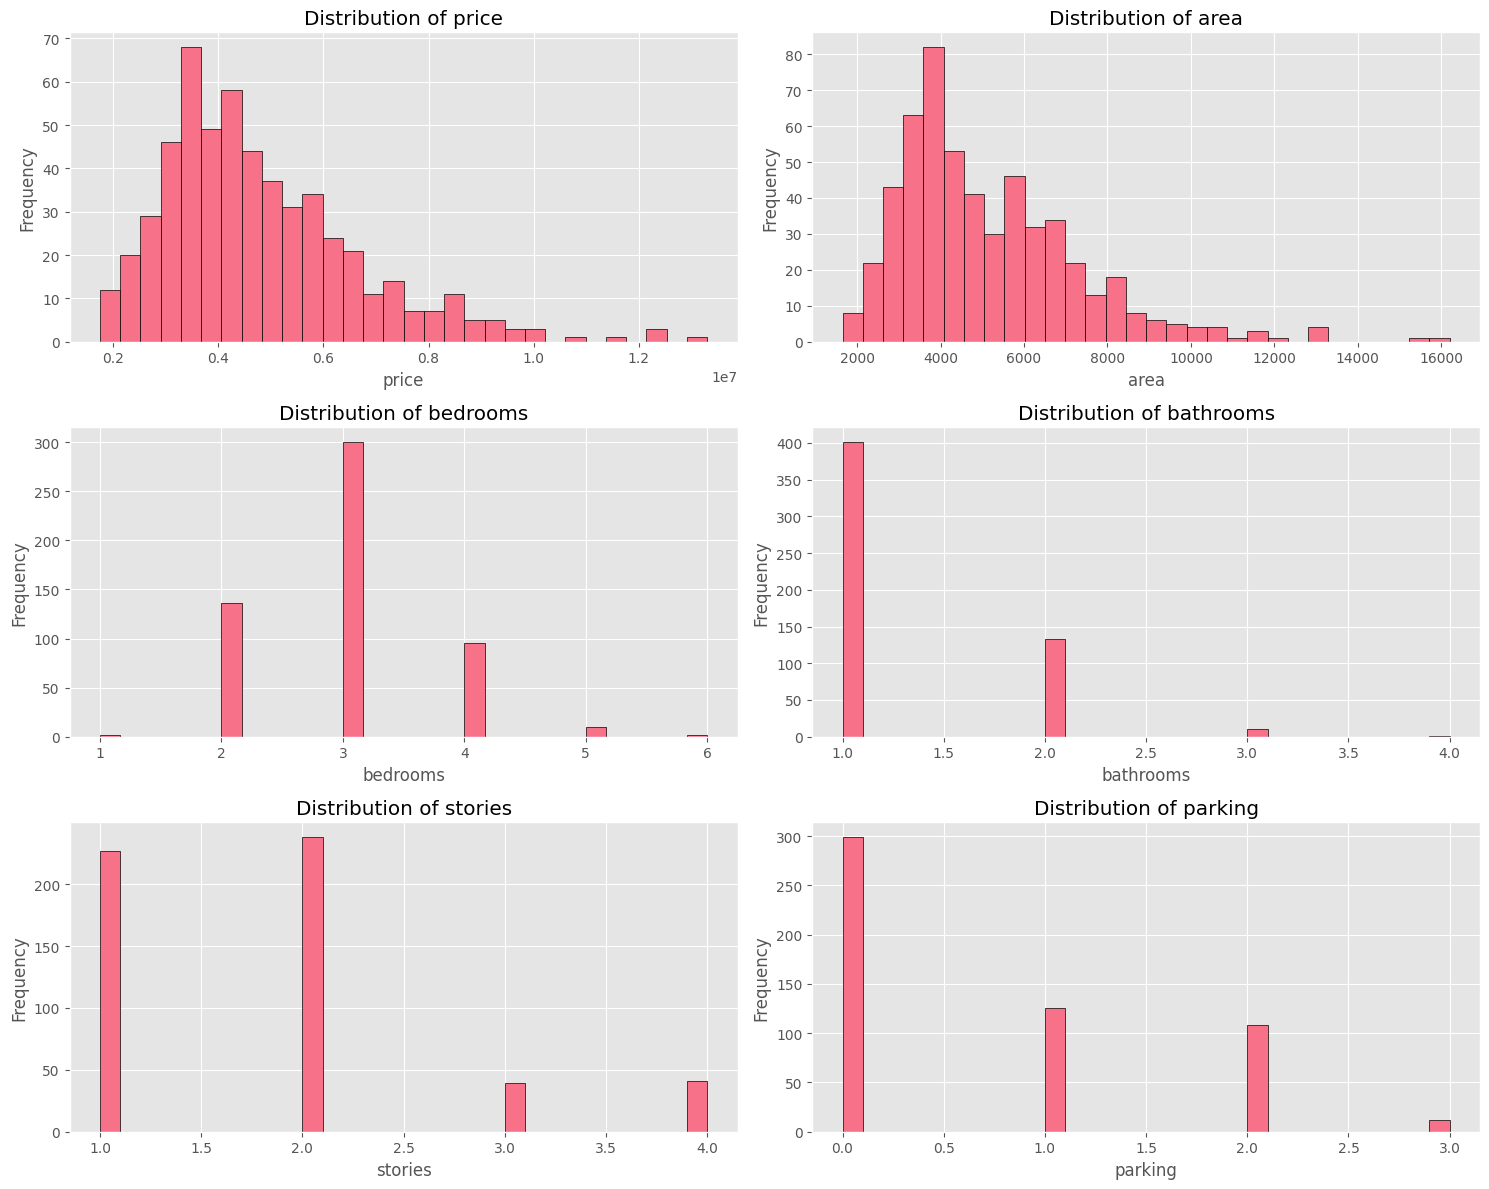

In [43]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
print(f"Numerical columns: {numerical_cols}")
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()
for idx, col in enumerate(numerical_cols):
    if idx < len(axes):
        axes[idx].hist(df[col].dropna(), bins=30, edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

Analyzing Categorical Features.

In [44]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print(f"Categorical columns: {categorical_cols}")
for col in categorical_cols:
    print(f"\n=== {col} ===")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

Categorical columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

=== mainroad ===
mainroad
yes    468
no      77
Name: count, dtype: int64
Unique values: 2

=== guestroom ===
guestroom
no     448
yes     97
Name: count, dtype: int64
Unique values: 2

=== basement ===
basement
no     354
yes    191
Name: count, dtype: int64
Unique values: 2

=== hotwaterheating ===
hotwaterheating
no     520
yes     25
Name: count, dtype: int64
Unique values: 2

=== airconditioning ===
airconditioning
no     373
yes    172
Name: count, dtype: int64
Unique values: 2

=== prefarea ===
prefarea
no     417
yes    128
Name: count, dtype: int64
Unique values: 2

=== furnishingstatus ===
furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64
Unique values: 3


Categorical vs Price Analysis

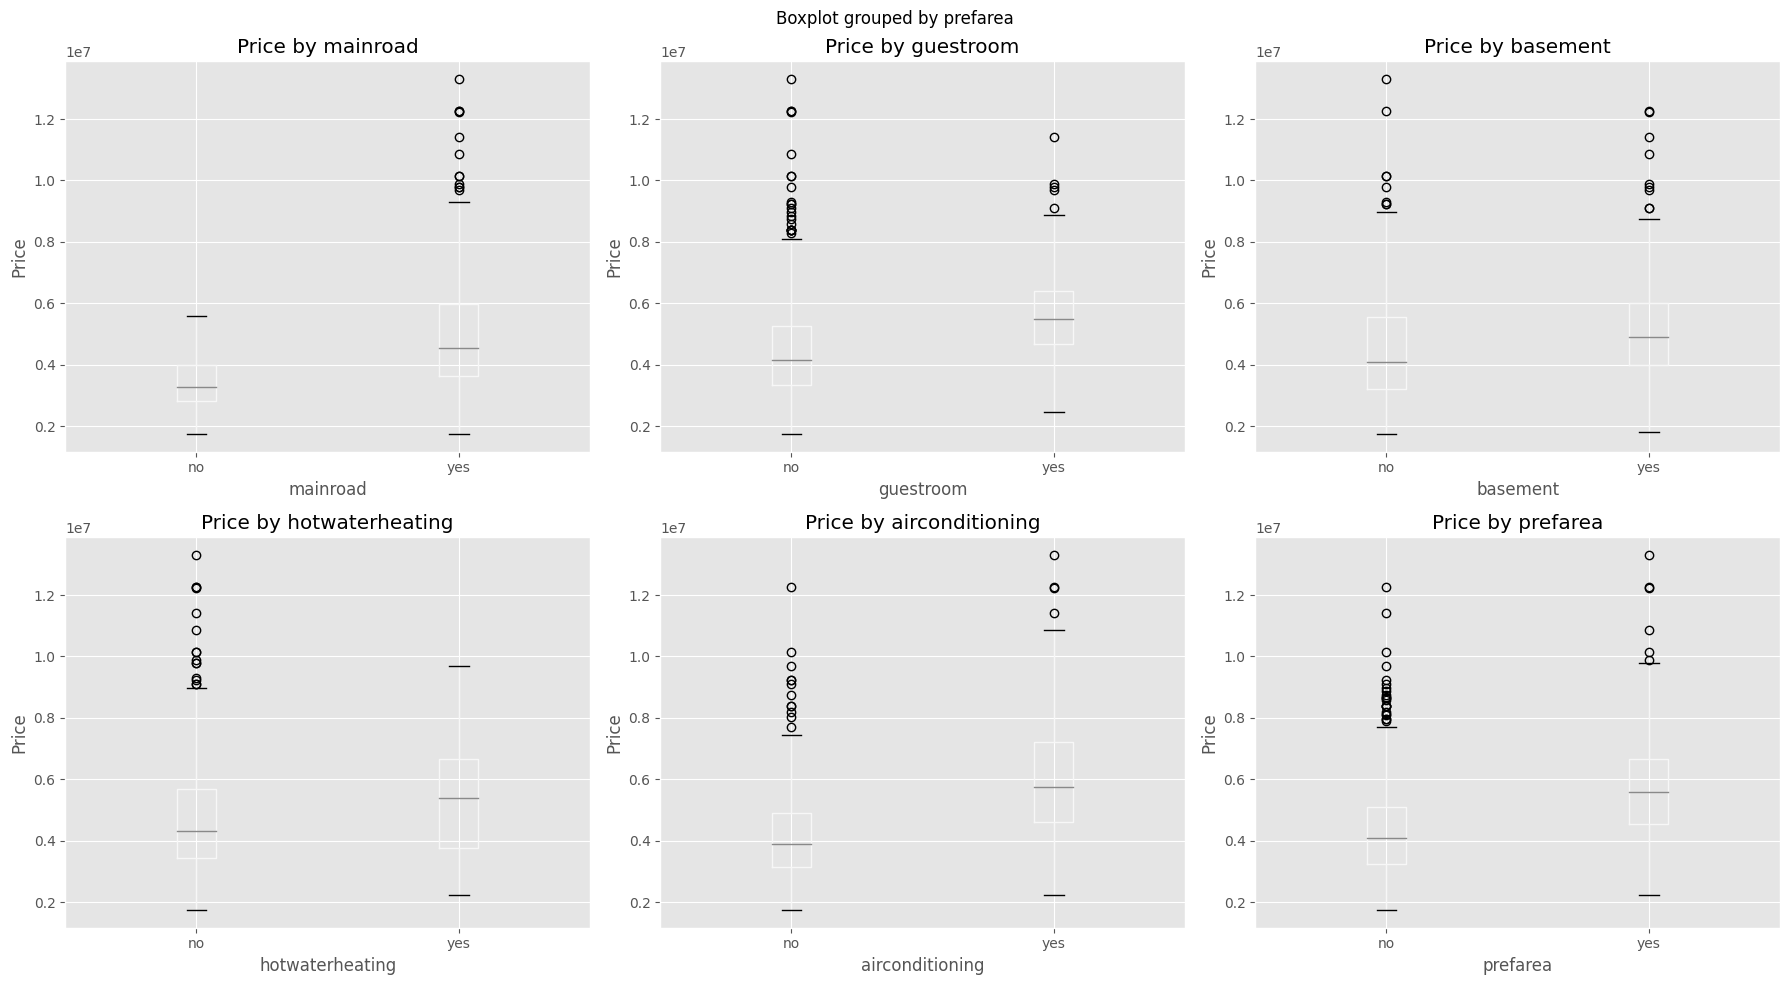

In [45]:
# How do categorical features affect price?
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()
for idx, col in enumerate(categorical_cols):
    if idx < len(axes):
        df.boxplot(column='price', by=col, ax=axes[idx])
        axes[idx].set_title(f'Price by {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Price')
plt.tight_layout()
plt.show()

Correlation Analysis

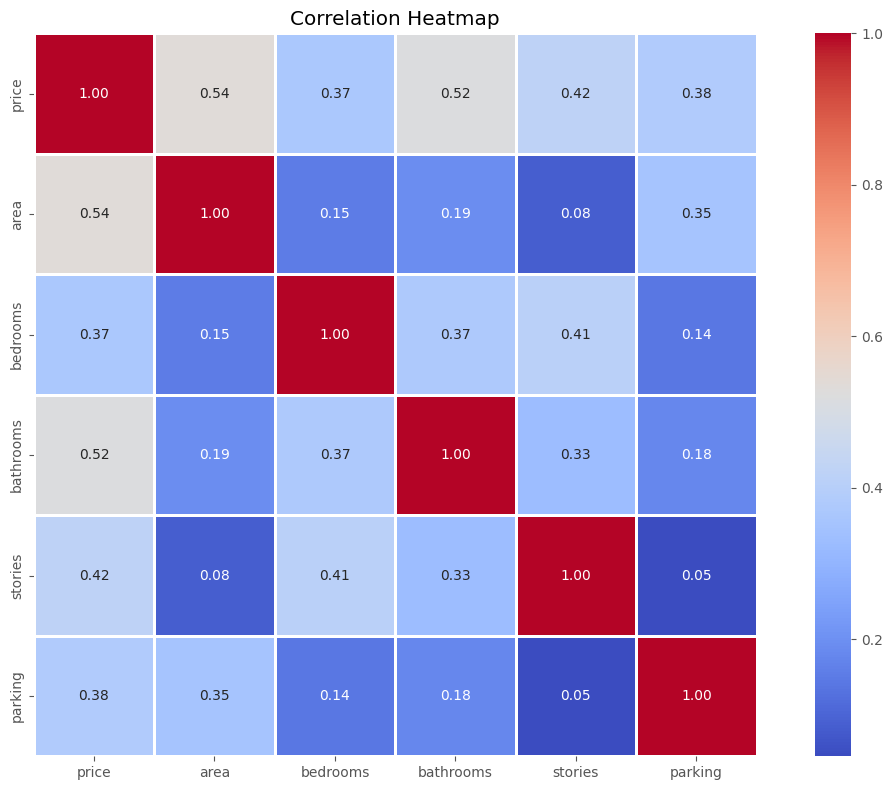


=== Correlation with Price ===
price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [46]:
# Correlation matrix for numerical features
plt.figure(figsize=(12, 8))
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1)
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

print("\n=== Correlation with Price ===")
price_corr = df[numerical_cols].corr()['price'].sort_values(ascending=False)
print(price_corr)

Outlier Detection.

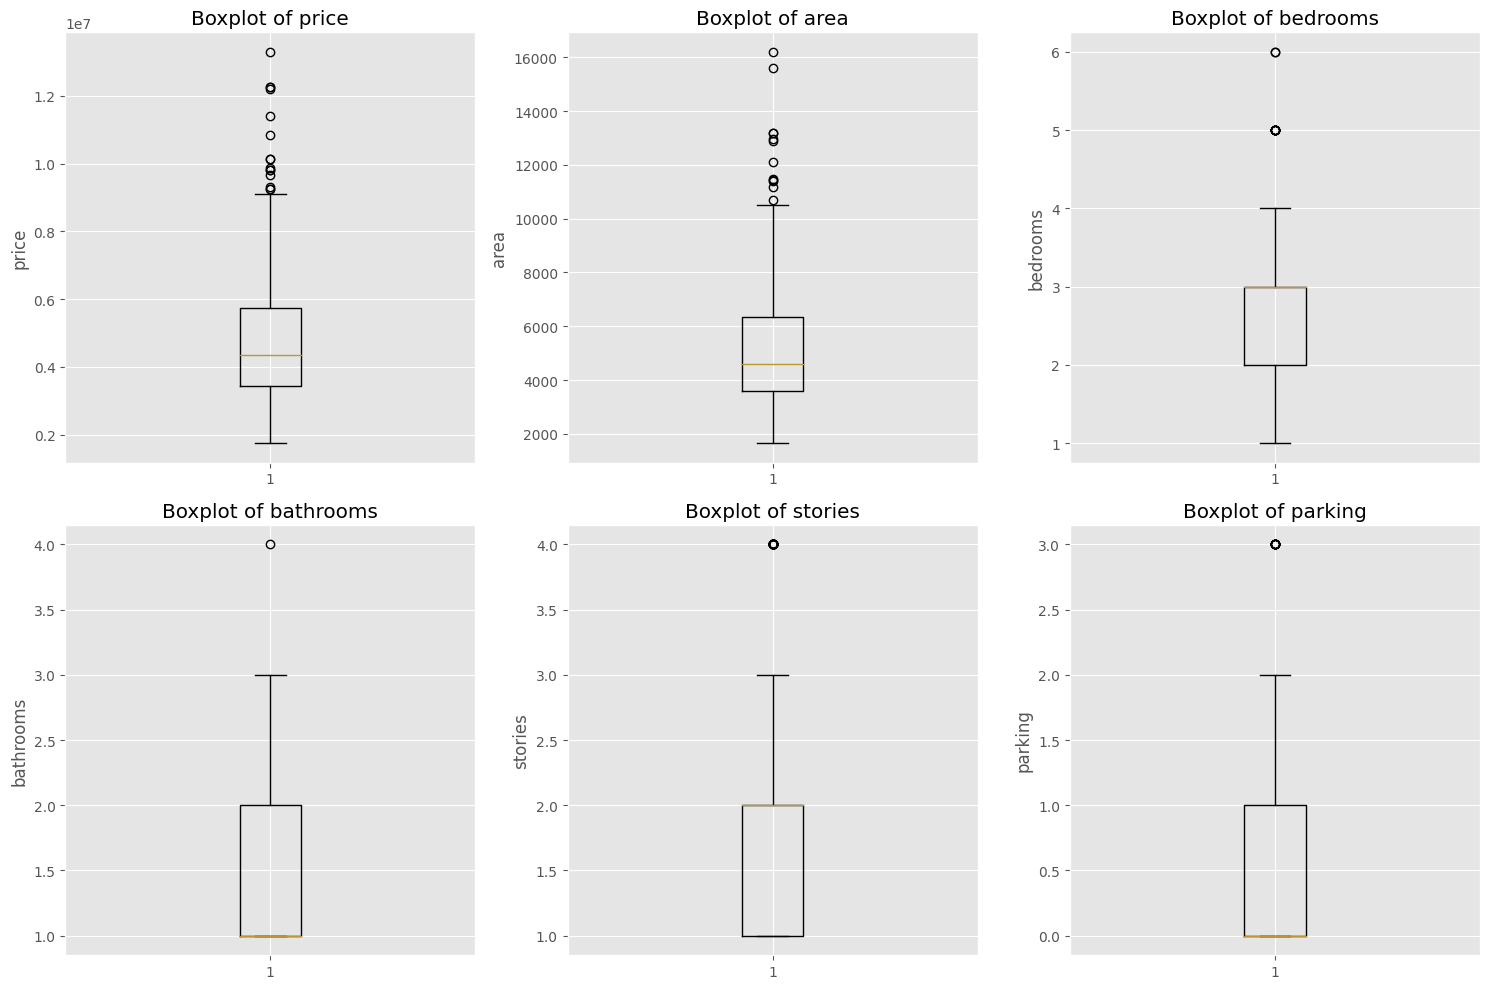


price: 15 outliers detected (2.75%)

area: 12 outliers detected (2.20%)

bedrooms: 12 outliers detected (2.20%)

bathrooms: 1 outliers detected (0.18%)

stories: 41 outliers detected (7.52%)

parking: 12 outliers detected (2.20%)


In [47]:
# Boxplots to detect outliers
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()
for idx, col in enumerate(numerical_cols[:6]):
    if idx < len(axes):
        axes[idx].boxplot(df[col].dropna())
        axes[idx].set_title(f'Boxplot of {col}')
        axes[idx].set_ylabel(col)

plt.tight_layout()
plt.show()
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[(df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))]
    
    if len(outliers) > 0:
        print(f"\n{col}: {len(outliers)} outliers detected ({len(outliers)/len(df)*100:.2f}%)")

Price Distribution plotted with median and it's outlier detection for further analysis.

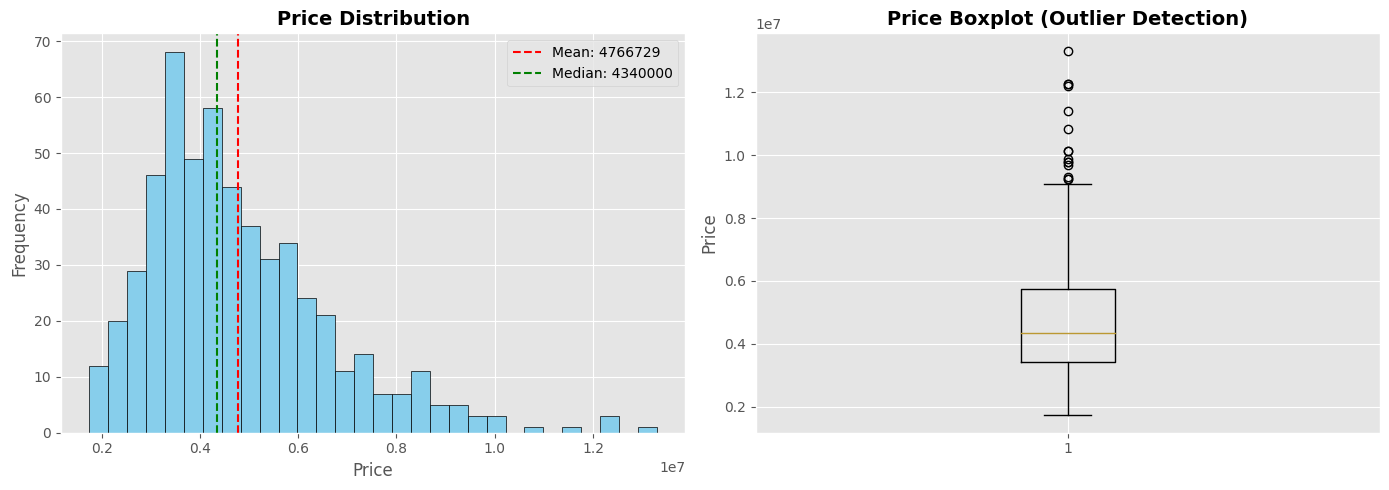


Price Skewness: 1.21
Interpretation: Highly right-skewed (few very expensive houses)


In [48]:
# Price distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['price'], bins=30, edgecolor='black', color='skyblue')
axes[0].set_title('Price Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Frequency')
axes[0].axvline(df['price'].mean(), color='red', linestyle='--', label=f'Mean: {df["price"].mean():.0f}')
axes[0].axvline(df['price'].median(), color='green', linestyle='--', label=f'Median: {df["price"].median():.0f}')
axes[0].legend()

axes[1].boxplot(df['price'])
axes[1].set_title('Price Boxplot (Outlier Detection)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Price')
plt.tight_layout()
plt.show()

skewness = df['price'].skew()
print(f"\nPrice Skewness: {skewness:.2f}")
print("Interpretation: ", end="")
if skewness > 1:
    print("Highly right-skewed (few very expensive houses)")
elif skewness > 0.5:
    print("Moderately right-skewed")
elif skewness < -1:
    print("Highly left-skewed")
elif skewness < -0.5:
    print("Moderately left-skewed")
else:
    print("Approximately symmetric")